In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
fb = pd.read_csv('../data/facebook.csv', index_col=0)
ms = pd.read_csv('../data/microsoft.csv', index_col=0)

## Create a new column in the DataFrame (1) - Price difference

In [4]:
#Create a new column PriceDiff in the DataFrame fb
fb['PriceDiff'] = fb['Close'].shift(-1) - fb['Close']

In [8]:
#Your turn to create PriceDiff in the DataFrame ms
ms['PriceDiff'] = ms['Close'].shift(-1) - ms['Close']

In [9]:
#Run this code to display the price difference of Microsoft on 2015-01-05
print(ms['PriceDiff'].loc['2015-01-05'])

-0.68


** Expected Output: ** -0.68

## Create a new column in the DataFrame (2) - Daily return

Daily Return is calcuated as PriceDiff/Close

In [ ]:
#Create a new column Return in the DataFrame fb
fb['Return'] = fb['PriceDiff'] /fb['Close']

In [10]:
#Your turn to create a new column Return in the DataFrame MS
ms['Return'] = ms['PriceDiff'] / ms['Close']

In [11]:
#Run this code to print the return on 2015-01-05
print(ms['Return'].loc['2015-01-05'])

-0.0146773142811


** Expected Output: ** -0.0146773142811

## Create a new column in the DataFrame using List Comprehension - Direction

In [ ]:
#Create a new column Direction. 
#The List Comprehension means : if the price difference is larger than 0, denote as 1, otherwise, denote as 0,
#for every record in the DataFrame - fb

fb['Direction'] = [1 if fb['PriceDiff'].loc[ei] > 0 else 0 for ei in fb.index ]

In [13]:
# Your turn to create a new column Direction for MS

ms['Direction'] = [1 if ms['PriceDiff'].loc[ei] > 0 else 0 for ei in ms.index]

In [14]:
# Run the following code to show the price difference on 2015-01-05
print('Price difference on {} is {}. direction is {}'.format('2015-01-05', ms['PriceDiff'].loc['2015-01-05'], ms['Direction'].loc['2015-01-05']))

Price difference on 2015-01-05 is -0.6799999999999997. direction is 0


** Expected Output: ** Price difference on 2015-01-05 is -0.6799999999999997. direction is 0

## Create a new column in the DataFrame using Rolling Window calculation (.rolling()) - Moving average

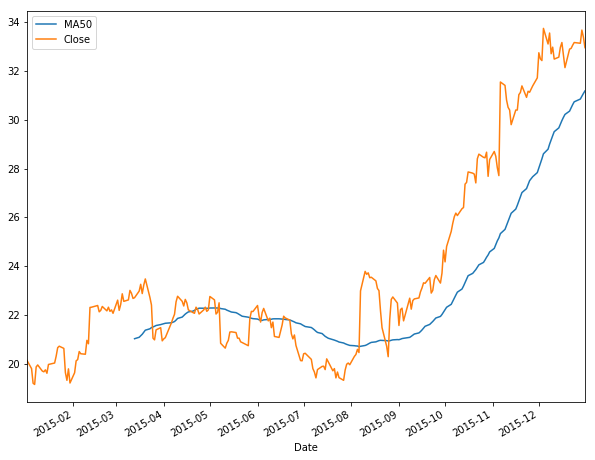

In [15]:
fb['ma50'] = fb['Close'].rolling(50).mean()

#plot the moving average
plt.figure(figsize=(10, 8))
fb['ma50'].loc['2015-01-01':'2015-12-31'].plot(label='MA50')
fb['Close'].loc['2015-01-01':'2015-12-31'].plot(label='Close')
plt.legend()
plt.show()

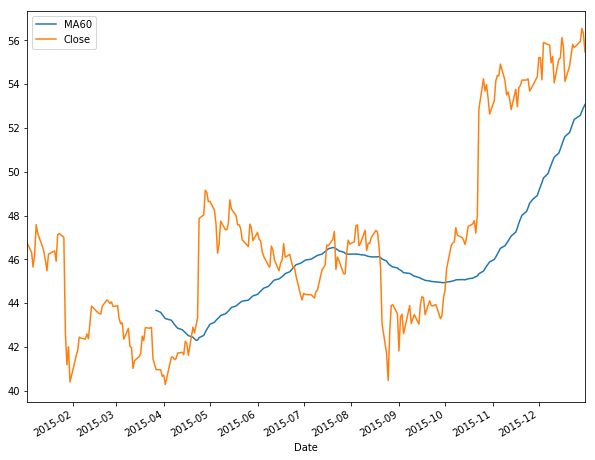

In [16]:
# You can use .rolling() to calculate any numbers of days' Moving Average. This is your turn to calculate "60 days"
# moving average of Microsoft, rename it as "ma60". And follow the codes above in plotting a graph

ms['ma60'] = ms['Close'].rolling(60).mean()

#plot the moving average
plt.figure(figsize=(10, 8))
ms['ma60'].loc['2015-01-01':'2015-12-31'].plot(label='MA60')
ms['Close'].loc['2015-01-01':'2015-12-31'].plot(label='Close')
plt.legend()
plt.show()

** Expected Output: **

<img src="MA.png">

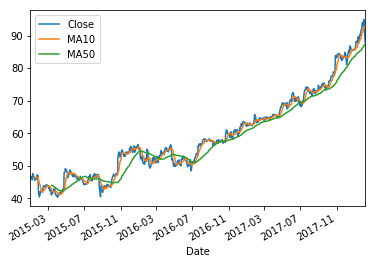

In [17]:
ms['MA10'] = ms['Close'].rolling(10).mean()
ms['MA50'] = ms['Close'].rolling(50).mean()

ms['Close'].plot(legend=True)
ms['MA10'].plot(legend=True)
ms['MA50'].plot(legend=True)

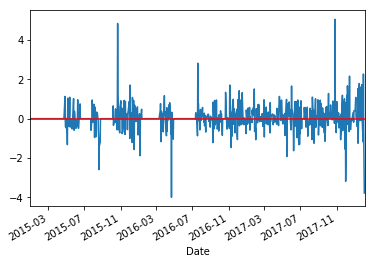

In [26]:
ms['Shares'] = [1 if ms.loc[ei, 'MA10'] > ms.loc[ei, 'MA50']
                else 0 for ei in ms.index]
ms['Close1'] = ms['Close'].shift(-1)
ms['Profit'] = [ms.loc[ei, 'Close1'] - ms.loc[ei, 'Close']
                if ms.loc[ei, 'Shares'] == 1
                else 0 for ei in ms.index]

ms['Profit'].plot()
plt.axhline(y=0, color='red')

Total money you have is 23.53000699999999
Total money you spent is 46.450001


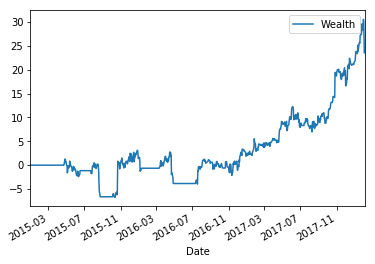

In [28]:
ms['Wealth'] = ms['Profit'].cumsum()
print(f"Total money you have is {ms.loc[ms.index[-2], 'Wealth']}")
print(f"Total money you spent is {ms.loc[ms.index[0], 'Close']}")
ms['Wealth'].plot(legend=True)